# Στοιχεία ομάδας
### Ομάδα Β3
### Μπάκος Παναγιώτης ( 03113014 )
### Φώτος Νικόλαος ( 03113122)


# ___
# Εισαγωγή του dataset

To συγκεκριμένο dataset περιέχει πληροφορίες απο ασθενείς ηπατίτιδας. Συγκεκριμένα, διαχωρίζει τα άτομα σε δύο κλάσεις, DIE και LIVE, καθορίζοντας δηλαδή το αν έζησαν ή πέθαναν, ανάλογα με τις τιμές των features στα οποία εστιάζει το συγκεκριμένο dataset. Tα features αυτά είναι(με τη σειρά που εμφανίζονται στο dataset):
- AGE: 10, 20, 30, 40, 50, 60, 70, 80
- SEX: male, female
- STEROID: no, yes
- ANTIVIRALS: no, yes
- FATIGUE: no, yes
- MALAISE: no, yes
- ANOREXIA: no, yes
- LIVER BIG: no, yes
- LIVER FIRM: no, yes
- SPLEEN PALPABLE: no, yes
- SPIDERS: no, yes
- ASCITES: no, yes
- VARICES: no, yes
- BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
- ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
- SGOT: 13, 100, 200, 300, 400, 500, 
- ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
- PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
- HISTOLOGY: no, yes
Πιο πάνω είδαμε και τις πιθανές τιμές που έχει κάθε χαρακτηριστικό.
Για τα μη αριθμητικά features, όπως και για την κλάση κάθε datum, (πχ SEX, ANTIVIRALS κτλ) χρησιμοποιούνται οι αριθμοί 1 και 2 για την 1<sup>η</sup> και 2<sup>η</sup> επιλογή αντίστοιχα.

Το dataset αυτό περιέχει 155 δείγματα, 123 εξ αυτών ανήκουν στην κλάση "LIVE", ενώ τα υπόλοιπα 32 στην κλάση "DIE".

Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά. Δεν υπάρχουν επικεφαλίδες ή αρίθμηση γραμμών, επομένως δεν χρειάστηκε ιδιαίτερη επεξεργασία του αρχείου [hepatitis.data](http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data) για να αρχίσουμε την εργασία μας.


Οι ετικέτες των κλάσεων αναφέρθηκαν και προηγουμένως, είναι οι DIE(1) και LIVE(2). Στην παρένθεση αναφέρεται ο αριθμός που χρησιμοποιείται για να δηλώσει την αντίστοιχη κλάση. Βρίσκονται στην πρώτη κολόνα του dataset, επομένως όταν διαβάσαμε το αρχείο η πρώτη εντολή που χρησιμοποιήσαμε ήταν να απομονώσουμε τα **labels**  και να κρατήσουμε τα **features** σε ξεχωριστό πίνακα.

## Εισαγωγή dataset μέσω Pandas και CSV file

To scikit learn έχει διαθέσιμο για φόρτωση απευθείας με συναρτήσεις μόνο ένα μικρό αριθμό datasets. Στη γενική περίπτωση, η τυπική διαδικασία για εισαγωγή datasets που θα συναντήσουμε είναι να διαβάζουμε ένα delimited text file (τιμές που διαχωρίζονται με ένα delimiter δλδ comma -Comma Separated Values, CSV-, semicolon etc) και να το αποθηκεύουμε σε πίνακες χαρακτηριστικών και ετικετών (class labels). 

Θα κάνουμε την προηγούμενη διαδικασία manually διαβάζοντας το hepatitis.data από text file. Η σελίδα του UCI για το hepatitis είναι [αυτή](http://archive.ics.uci.edu/ml/datasets/Hepatitis), και το dataset μπορούμε να το αποθηκεύσουμε locally στο Desktop απο το φάκελο "Data Folder" και το αρχείο ["hepatitis.data"](http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data). Το ανοίγουμε, δεξί κλικ και "Save as" (ή απευθείας "Save link as"). 

Το ανεβάζουμε στο notebook μέσω του "Find and Add Data" button. Mπορουμε να το κάνουμε drop ή να κάνουμε browse. Πάμε σε code block και κάνουμε "Insert to code" και "Insert StringIO object". Θα γίνει εισαγωγή μιας απαραίτητης συνάρτησης (μια φορά τη χρειαζόμαστε στο notebook, όσα object και να εισάγουμε). Τρέξτε αυτό το block κώδικα.

Διάβασμα του dataset από το αρχείο "hepatitis.data"

In [1]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_5316e7a69db5426985a12d9a54c83590(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_1ab9e048120160a5e8396dfa07a8d5f8e293377c','domain': {'id': '4c90ae73b04240468ffdd9a6ceefd289'},
            'password': 'Dw1vuvFufSk1[^~2'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_1 = get_object_storage_file_with_credentials_5316e7a69db5426985a12d9a54c83590('NeuralNetworks', 'hepatitis.data')

# data contains no header info so we read a panda dataframe with header=None option
data_df = pd.read_csv(data_1, header=None)
labels_df = data_df.iloc[:, [0]]
features_df = data_df.iloc[:, 1:]

### Υπολογισμός και εκτύπωση εντός του notebook:
Εμφανίζουμε αρχικά τις διαφορετικές κλάσεις που εμφανίζονται. Βλέπουμε ότι είναι 2. DIE(1) και LIVE(2) με τα ποσοστά που εμφανίζονται παρακάτω.

In [2]:
import numpy as np

# μετατρέπουμε το dataframe σε numpy array
features_nan = features_df.values
labels = labels_df.values.flatten()

discrete_classes = list(set(labels))
print 'Στο dataset εμφανίζονται οι κλάσεις',discrete_classes
mapping_classes = {1:"DIE",2:"LIVE"}

for i in discrete_classes:
    print 'Εμφανίζεται ποσοστό δειγμάτων %.2f %% για την κλάση %s' % (100.0*sum(labels==i)/len(labels),mapping_classes[i])

Στο dataset εμφανίζονται οι κλάσεις [1, 2]
Εμφανίζεται ποσοστό δειγμάτων 20.65 % για την κλάση DIE
Εμφανίζεται ποσοστό δειγμάτων 79.35 % για την κλάση LIVE


Όπως μας ενημερώνει και η [περιγραφή](http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names) του dataset, υπάρχουν 167 απουσιάζουσες τιμές χαρακτηριστικών, δηλωμένες σαν '?'. Παρακάτω εκτυπώνεται αναλυτικά πόσες απουσιάζουσες τιμές έχουμε ανά κλάση.

Επιλέγουμε να διαχειριστούμε τις απουσιάζουσες τιμές ως εξής: θα αντικαταστήσουμε τις τιμές αυτές με το μέσο όρο του feature στο οποίο αντιστοιχούν. Με αυτόν τον τρόπο δεν μειώνουμε περαιτέρω το μέγεθος του dataset, που είναι ήδη αρκετά μικρό, ενώ ακόμη η χρήση της μέσης τιμής δεν επηρεάζει αρνητικά την εκπαίδευση των ταξινομητών αργότερα.

In [3]:
from sklearn.preprocessing import Imputer

print 'Οι απουσιάζουσες τιμές είναι',sum(sum(features_nan== '?'))
print 'Ανά χαρακτηριστικό διανέμονται ως εξής\n',(sum(features_nan== '?'))

features_nan[features_nan=='?'] = float('NaN')
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #different strategies are 'median', 'most_frequent'
imp.fit(features_nan)
features = imp.transform(features_nan)

Οι απουσιάζουσες τιμές είναι 167
Ανά χαρακτηριστικό διανέμονται ως εξής
[ 0  0  1  0  1  1  1 10 11  5  5  5  5  6 29  4 16 67  0]


# ___

# Train set, test set & αξιολόγηση (πιστότητα) ταξινομητών

Η αξιολόγηση των ταξινομητών γίνεται πάντα σε δεδομένα που δεν έχουν δει κατά την εκπαίδευση έτσι ώστε να αξιολογήσουμε τη δυνατότητα γενίκευσής τους. Συνεπώς, πρωτού φτιάξουμε το μοντέλο κάθε ταξινομητή χωρίζουμε τα δεδομένα μας τυχαία σε ένα σύνολο εκπαίδευσης (train set) και ένα σύνολο ελέγχου (test set).

Χρησιμοποιούμε το train set για να εκτιμούμε και να βελτιώνουμε το μοντέλο του ταξινομητή κατά την ανάπτυξή του.

Χρησιμοποιούμε μετά το test set για να αξιολογήσουμε στατιστικά την απόδοση του μοντέλου μας.

Το sklearn έχει τη συνάρτηση train_test_split() που ανακατεύει τυχαία τα δείγματα και τα διαχωρίζει σε train και test με βάση κάποιο ποσοστό που θα της δώσουμε.



In [4]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2,random_state=1)

train_dummy = train
train_labels_dummy = train_labels 
test_dummy = test
test_labels_dummy = test_labels

# ___
# Προεπεξεργασία δεδομένων

Οι μεταβλητές **_kanon_**  και **_resample_** καθορίζουν αν τελικά θα λάβουμε τις αλλαγές στα train και test δεδομένα υπόψιν μας. 
Απενεργοποιήστε τες, αλλά τρέχτε το όλο από την αρχή, για να δείτε διαφορά στα αποτελέσματα.

Η προεπεξεργασία των δεδομένων έχει νόημα μόνο για classifiers που επιδέχονται βελτιστοποίησης, γι αυτό ο dummy classifier, που δεν ανήκει στην κατηγορία αυτή, θα εκπαιδευτεί και αξιολογηθεί πάνω στα αρχικά δεδομένα.


In [5]:
kanon=1 # αν θα γίνει κανονικοποίηση των δεδομένων
#kanon=2 # το ΄ιδιο με  min max scaling
resample=1 # αν θα γίνει εξισορρόπηση των δεδομένων

Αφού εισάγαμε τα δεδομένα και κάναμε μια πρώτη επισκόπηση και τα φέραμε στη σωστή μορφοποίηση, περνάμε στο επόμενο στάδιο, αυτό της προεπεξεργασίας (data preprocessing). Σε πολλά προβλήματα ταξινόμησης (και machine learning γενικότερα) η προεπεξεργασία είναι ένα πολύ σημαντικό κομμάτι (και συχνά πολύ χρονοβόρο) ολόκληρης της διαδικασίας το οποίο όμως συχνά έχει πολύ μεγάλο αντίκτυπο στην επίδοση του συστήματος.  Σε αυτή την ενότητα θα κάνουμε μια εισαγωγή στα βασικά βήματα προεπεξεργασίας και το πώς το υλοποιούμε σε Python.

## Dataset με αριθμητικά και κατηγορικά χαρακτηριστικά

Με μελέτη των δεδομένων, παρατηρούμε ότι δεν υπάρχουν κατηγορικά (μη αριθμητικά) χαρακτηριστικά. Επομένως δεν χρειάζεται να κάνουμε κάτι σε αυτό το βήμα

## Η κατάρα της διαστατικότητας (Curse of dimensionality) & Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών

Μια πολύ σημαντική παράμετρος για την απόδοση των ταξινομητών είναι η διάσταστικότητα των δεδομένων, ιδιαίτερα σε σχέση με τον διαθέσιμο αριθμό δειγμάτων. Γενικά και ανεξάρτητα από το μοντέλο του ταξινομητή, η απόδοση αυξάνεται όσο αυξάνεται το πλήθος και η ποιότητα των δεδομένων και όσο μειώνεται η διαστατικότητα. Αντίστροφα, τα προβλήματα δυσκολεύουν όσο η διαστατικότητα αυξάνεται και τα δείγματα δεν επαρκουν για να καλύψουν όλες τις κατηγορίες του προβλήματος. Αναφερόμαστε στο πρόβλημα αυτό ώς την κατάρα της διαστατικότητας (the curse of dimensionality): όσο αυξάνει η διαστατικότητα, τόσο τα διαθέσιμα δεδομένα γίνονται αραιά (sparse). 

Για να μειωθεί η διαστατικότητα των δεδομένων χρησιμοποιούμε τεχνικές **μείωσης διαστάτικότητας (dimensionality reduction)**. To dimensionality reduction γίνεται με τεχνικές επιλογής χαρακτηριστικών (feature selection) όπου ουσιαστικά αφαιρούμε κάποια χαρακτηριστικά με βάση ένα κριτήριο χωρίς μετασχηματισμό των τιμών τους και τεχνικές εξαγωγής χαρακτηριστικών (feature extraction), όπου μετασχηματίζουμε τις τιμές των χαρακτηριστικών σε νέες (εξάγουμε δηλαδή νέα χαρακτηριστικά) αλλά σε ένα χώρο μικρότερων διαστάσεων.

Για την επιλογή χαρακτηριστικών υπάρχουν πολλές διαφορετικές τεχνικές (πχ [εδώ](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) οι επιλογές του scikit-learn). Μια απλή τεχνική επιλογής χαρακτηριστικών είναι το ελάχιστο κατώφλι της διακύμανσης (Variance threshold). Σε γενικές γραμμές αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Ειδικά στην περίπτωση που η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό εχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν χρησιμέυει καθόλου στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανανικοποίηση των χαρακτηριστικών. 

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση VarianceThreshold για να αφαιρέσουμε τα  χαρκτηριστικά στο training set που έχουν μηδενική διακύμανση (default) ή πολύ χαμηλή. Πρέπει επίσης να πάρουμε μια μάσκα (index) των χαρακτηριστικών που επιλέγουμε, ώστε να την εφαρμόσουμε και στα δεδομένα train ώστε να έχουν τις ίδιες διαστάσεις. Αυτό δεν σπάει τον κανόνα ότι δεν χρησιμοποιούμε τα δεδομένα test γιατί μπορούμε να θεωρήσουμε ότι ο ταξινομητής απλώς αγνοεί τις εισόδους που δεν περιλαμβάνονται στη μάσκα. Ας ελέγξουμε εάν χρειάζεται στο συγκεκριμένο dataset να γίνει μείωση διαστατικότητας :


In [6]:
from sklearn.feature_selection import VarianceThreshold
# αρχικοποιούμε έναν selector
selector = VarianceThreshold()
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
print mask


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


Παρατηρούμε ότι δεν χρειάζεται να αφαιρέσουμε κανένα feature από το dataset μας. Συνεχίζουμε με την προεπεξεργασία των δεδομένων.

## Κανονικοποίηση χαρακτηριστικών

Μετά την επιλογή χαρακτηριστικών η επόμενη τεχνική προεπεξεργασίας που μπορούμε να κάνουμε είναι η κανονικοποίηση των χαρακτηριστικών. Χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. Για παράδειγμα ένα χαρακτηριστικό με πολύ μεγάλες τιμές θα έχει μεγαλύτερη επίδραση στον υπολογισμό της απόστασης στον kNN απότι ένα με μικρές τιμές, χωρίς αυτό να σημαίνει απαραίτητα ότι είναι περισσότερο καθοριστικό για το διαχωρισμό των κλάσεων. Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές.

Η κανονικοποίηση των χαρακτηριστικών μπορεί να γίνει με 2 βασικούς τρόπους, γνωστούς και από τη στατιστική. Με την διαίρεση με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το z-score (ή standard score) του κάθε χαρακτηριστικού (standardization), που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα, σαν την κανονική κατανομή. 

Η μετατροπή μεγίστου ελαχίστου γίνεται με τον τύπο $$X' = {X - X_{min} \over X_{max} - X_{min}}$$Η μετατροπή σε standard score γίνεται με τον τύπο: $$z = {X- \mu \over \sigma}$$ όπου: $μ$ είναι η μέση τιμή του χαρακτηριστικού και $σ$ η απόκλιση. Στην πράξη δεν μας ενδιαφέρει αν η πραγματική κατανομή των χαρακτηριστικών είναι κανονική, απλά αφαιρούμε τη μέση τιμή και διαιρούμε με την απόκλιση για να έχουν τα χαρακτηριστικά της.

H μετατροπή σε standard score είναι απαραίτητη σε πολλούς ταξινομητές για να συμπεριφερθούν σωστά. Επίσης είναι πιο ανθεκτική από την min max σε τιμές outliers δηλαδή σποραδικές τιμές που είναι πολύ μακριά απο τη μέση τιμή και τις υπόλοιπες τιμές του χαρακτηριστικού (η min max θα συμπιέσει τις περισσότερες τιμές σε ένα μικρό διάστημα)

Από την άλλη η κλιμάκωση σε [0,1] είναι λιγότερο ευαίσθητη σε πολυ μικρές αποκλίσεις και επίσης σε αραιά (sparse) διανύσματα χαρακτηριστικών (δηλαδή με πολλές μηδενικες τιμές) η εφαρμογή της διατηρεί τα μηδέν, κάτι που μπορεί να είναι καθοριστικό για την ταχύτητα εκπαίδευσης.



Με τον ορό μη ισορροπημένο dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). Στα πραγματικά datasets αυτό είναι κάτι πολύ κοινό. Οι περισσότεροι ταξινομητές ωστόσο εκπαιδεύονται καλύτερα όταν τα δείγματα όλων των κλάσεων είναι σχετικά ισάριθμα.
Για να δούμε αν το dataset μας είναι ισορροπημένο ή μη θα δούμε πόσα δείγματα έχουμε ανά κατηγορία στο training set. Εφόσον κάθε δείγμα ανήκει σε μια μόνο από τις 2 κατηγορίες κάνουμε απλά:

_( **Προσοχή:** ό,τι μετασχηματισμό κανονικοποίησης κάνουμε στο train set θα τον κάνουμε και στο test set, χρησιμοποιώντας όμως απαραίτητα το max ή τα $μ$ και $σ$ που έχουμε βρει στο train set, πράγμα που σημαίνει ότι στο test set μετά την κανονικοποίηση δεν θα έχουμε απαραίτητα παντού τιμές μεταξύ 0 και 1 και αντίστοιχα ούτε μέση τιμή 0 και διακύμανση 1. )_

In [7]:
from sklearn import preprocessing

# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
scaler = preprocessing.StandardScaler().fit(train)
# μέση τιμη και απόκλιση του train set (δεν έχουμε εφαρμόση το scaling) 

# εφαρμόζουμε τον scaler στα δεδομένα test. ΠΡΟΣΟΧΗ μέθοδος transform, ΄όχι fit!
test_scaled = scaler.transform(test)

# Θα εφαρμόσουμε κανονικοποίηση με standardization στο (διορθωμένο και με επιλογή χαρακτηριστικών) dataset μας:
if kanon==1:
    scaler = preprocessing.StandardScaler().fit(train)
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
elif kanon==2:
    min_max_scaler = preprocessing.MinMaxScaler()
    train_scaled = min_max_scaler.fit_transform(train)
    test_scaled = min_max_scaler.transform(test)

if kanon :
    train = train_scaled
    test = test_scaled

## Εξισορρόπηση μη ισορροπημένων datasets

Με τον ορό μη ισορροπημένο dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). Στα πραγματικά datasets αυτό είναι κάτι πολύ κοινό. Οι περισσότεροι ταξινομητές ωστόσο εκπαιδεύονται καλύτερα όταν τα δείγματα όλων των κλάσεων είναι σχετικά ισάριθμα.  

Για να δούμε αν το dataset μας είναι ισορροπημένο ή μη θα δούμε πόσα δείγματα έχουμε ανά κατηγορία στο data set. Εφόσον κάθε δείγμα ανήκει σε μια μόνο από τις 2 κατηγορίες κάνουμε απλά: 

In [8]:
sum1 = sum(train_labels== 1)
sum2 = len(train_labels) - sum1
print 'To train dataset διαθέτει', sum1,'στοιχεία κατηγορίας 1 (DIE) και',sum2,'στοιχεία κατηγορίας 2 (LIVE)'

To train dataset διαθέτει 27 στοιχεία κατηγορίας 1 (DIE) και 97 στοιχεία κατηγορίας 2 (LIVE)


Προφανώς το train dataset(και το συνολικό dataset επομένως...) δεν είναι ισορροπημένο. Τα δεδομένα εκπαίδευσης δεν έχουν ισορροπημένα πλήθη ανά κατηγορία με την πιο συχνή κατηγορία να διαφέρει σημαντικά από τη λιγότερο συχνή.

Έχουμε δύο βασικούς τρόπους βασικούς τρόπους για να εξισσοροπούμε ένα dataset, την υποδειγματοληψία (undersampling) και την υπέρδειγματοληψία (oversampling). Εν ολίγοις, στο undersampling απλά αφαιρούμε τυχαία δείγματα από όλες τις κατηγορίες που έχουν μεγαλύτερο πλήθος από τη μικρότερη, ενώ στο oversampling επιλέγουμε τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Στην πρώτη δηλαδή αφαιρούμε δεδομένα ενώ στην άλλη προσθέτουμε. 

Γενικά το oversampling ενδείκνυται περισσότερο, αφού δεν χάνουμε δεδομένα εκπαίδευσης. Επίσης, σε κάποιους αλγορίθμους όπως πχ random forests, έχει παρατηρηθεί ότι τα αποτελέσματα βελτιώνονται ακόμα και με oversampling με παράγοντες άνω του 2, δηλαδή αντιγράφοντας τα ίδια δεδομένα μπορεί να βοηθάμε τη σύγκλιση. Τα προηγούμενα βέβαια δεν παρατηρούνται σε όλες τις περιπτώσεις.

 Η βιβλιοθήκη [imbalanced-learn (ή imblearn)](https://github.com/scikit-learn-contrib/imbalanced-learn) προσφέρει πολλές μεθόδους εξισορρόπησης datasets. Αφού εγκαταστήσουμε την imblearn θα κάνουμε ένα απλό random oversampling στο training set μας.

In [9]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(random_state=0)

train_resampled, train_labels_resampled = ros.fit_sample(train_scaled,train_labels)

# ξαναφέρνουμε τα labels σε binary μορφή
#trainTargets_resampled = mlb.transform(trainTargets_resampled)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print train_resampled.shape
# επιβεβαιώνουμε ότι τα labels είναι στη binary μορφή
print train_labels_resampled
# επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling

sum0 = sum(train_labels_resampled== 1)
sum1 = len(train_labels_resampled) - sum0
print 'To train dataset διαθέτει πλέον', sum1,'στοιχεία κατηγορίας 1 (DIE) και',sum2,'στοιχεία κατηγορίας 2 (LIVE)'

resample = 1
if resample == 1:
    train = train_resampled
    train_labels = train_labels_resampled

(194, 19)
[2 2 2 2 2 1 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 2 1 1 2 2 2 2 2
 2 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
To train dataset διαθέτει πλέον 97 στοιχεία κατηγορίας 1 (DIE) και 97 στοιχεία κατηγορίας 2 (LIVE)


# ___
# Dummy Classifier

Θα δοκιμάσουμε πρώτα κάποιες πολύ απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

In [10]:
from sklearn.dummy import DummyClassifier

hepatitis_accuracy = {}

dc_uniform = DummyClassifier(strategy="uniform")

# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
model = dc_uniform.fit(train_dummy, train_labels_dummy)

# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
preds_uni = dc_uniform.predict(test_dummy)

# υπολογίζουμε την ακρίβεια του συγκεκριμένου μοντέλου dummy classifier
hepatitis_accuracy['uniform (random)'] = dc_uniform.score(test_dummy, test_labels_dummy)

In [11]:
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
model = dc_constant_1.fit(train_dummy, train_labels_dummy)
preds_const1 = dc_constant_1.predict(test_dummy)
hepatitis_accuracy['constant 1'] = dc_constant_1.score(test_dummy, test_labels_dummy)

In [12]:
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
model = dc_constant_2.fit(train_dummy, train_labels_dummy)
preds_const2 = dc_constant_2.predict(test_dummy)
hepatitis_accuracy['constant 2'] = dc_constant_2.score(test_dummy, test_labels_dummy)

In [13]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
model = dc_most_frequent.fit(train_dummy, train_labels_dummy)
preds_mostfreq = dc_most_frequent.predict(test_dummy)
hepatitis_accuracy['most_frequent'] = dc_most_frequent.score(test_dummy, test_labels_dummy)

In [14]:
dc_stratified = DummyClassifier(strategy="stratified")
model = dc_stratified.fit(train_dummy, train_labels_dummy)
preds_strat = dc_stratified.predict(test_dummy)
hepatitis_accuracy['stratified'] = dc_stratified.score(test_dummy, test_labels_dummy)

Ας αποθηκεύσουμε την πιστότητα όλων των dummy classifiers σε ένα λεξικό και να την τυπώσουμε από την καλύτερη στη χειρότερη

In [15]:
if resample:
    print('Για ισορροπημένο dataset έχουμε τα ακόλουθα αποτελέσματα :\n')
else:
    print('Για μη ισορροπημένο dataset έχουμε τα ακόλουθα αποτελέσματα :\n')
for key, value in sorted(hepatitis_accuracy.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %.3f %%"  % (key, 100*value)
#Explanation: "d.iteritems()" returns an iterator object. In "sorted(d.iteritems(), key=lambda(k, v): (v, k))",
#"key=lambda(k, v): (v, k)" means sorting will be firstly based on the descending order of value i.e "-v" and then ascending order of key i.e "k"

Για ισορροπημένο dataset έχουμε τα ακόλουθα αποτελέσματα :

constant 2: 83.871 %
most_frequent: 83.871 %
stratified: 77.419 %
uniform (random): 48.387 %
constant 1: 16.129 %


Συχνά στην δυαδική ταξινόμηση θεωρούμε θετική την πιο σπάνια κλάση ή το φαινόμενο προς εντοπισμό (πχ διαβητικός). 

Ορίζουμε:
Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$).
$$P = \frac{T_p}{T_p+F_p}$$
Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$).
$$R = \frac{T_p}{T_p + F_n}$$
Συχνά χρησιμοποιούμε και το ($F_1$) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.
$$F1 = 2\frac{P \times R}{P+R}$$
Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off. Στην οριακή περίπτωση του ταξινομητή που επιστρέφει σταθερά μόνο τη θετική κλάση, η ανάκληση θα είναι 1 ($F_n=0$) αλλά η ακρίβεια θα έχει τη μικρότερη δυνατή τιμή της. Γενικά, κατεβάζοντας το κατώφλι της απόφασης του ταξινομητή, αυξάνουμε την ανάκληση και μειώνουμε την ακρίβεια και αντιστρόφως.

Στην πράξη και ειδικά σε μη ισορροπημένα datasets χρησιμοποιούμε την ακρίβεια, ανάκληση και το F1 πιο συχνά από την πιστότητα. 

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print 'Classification report for Dummy Classifier (constant=2)'
cr_dummy_class = classification_report(test_labels, preds_const2)
print cr_dummy_class

scores_weighted = {}
scores_macro = {}

scores_weighted['Dummy']=precision_recall_fscore_support(test_labels,preds_const2,average='weighted')
scores_macro['Dummy']=precision_recall_fscore_support(test_labels,preds_const2,average='macro')

print 'Confusion Matrix for Dummy Classifier (constant=2)'
print confusion_matrix(test_labels, preds_const2)

acc_dummy_class = 100*accuracy_score(test_labels,preds_const2)
print 'Accuracy percentage of this classifier is %.3f %%' % (acc_dummy_class)

Classification report for Dummy Classifier (constant=2)
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         5
          2       0.84      1.00      0.91        26

avg / total       0.70      0.84      0.77        31

Confusion Matrix for Dummy Classifier (constant=2)
[[ 0  5]
 [ 0 26]]
Accuracy percentage of this classifier is 83.871 %


/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# ___
# MLP 

Kάνουμε εκπαίδευση σε ένα Multi Layer Perceptron (MLP) με default παραμέτρους (σταθερές, που δεν τις βελτιστοποιούμε) στα αρχικά, μη επεξεργασμένα, δεδομένα και υπολογίζουμε precision, recall, f1. Θα δούμε ότι το MLP αδυνατεί να μάθει να κάνει προβλέψεις.

Το μοντέλο δεν λειτουργεί γιατί οι 5 νευρώνες του κρυμμένου επιπέδου είναι πολύ λίγοι για να μάθει τα πρότυπα εισόδου στη μη επεξεργασμένη τους μορφή και να μπορέσει να διαχωρίσει τις κλάσεις. Αν τους αυξήσουμε σε 15 θα λειτουργήσει αλλά με μέτρια αποτελέσματα.

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,), random_state=1)
clf.fit(train_dummy, train_labels_dummy)
preds = clf.predict(test_dummy)

print 'Classification report for MLP on initial data'
cr_mlp_dummy = classification_report(test_labels, preds)
print cr_mlp_dummy

scores_weighted['MLP_dummy']=precision_recall_fscore_support(test_labels,preds,average='weighted')
scores_macro['MLP_dummy']=precision_recall_fscore_support(test_labels,preds,average='macro')

print 'Confusion matrix for MLP on initial data'
print confusion_matrix(test_labels, preds)

acc_mlp_dummy = 100*accuracy_score(test_labels,preds)
print 'Accuracy percentage of this classifier is %.3f %%' % (acc_mlp_dummy)

Classification report for MLP on initial data
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         5
          2       0.84      1.00      0.91        26

avg / total       0.70      0.84      0.77        31

Confusion matrix for MLP on initial data
[[ 0  5]
 [ 0 26]]
Accuracy percentage of this classifier is 83.871 %


Παρατηρούμε από τον confusion matrix ότι εμφανίζει υψηλή επιτυχία, επειδή ταξινομεί τα πάντα σε μία κατηγορία. Κάτι τέτοιο φυσικά και δεν είναι επιθυμητό.
Το δοκιμάζουμε στα επεξεργασμένα δεδομένα, με default παραμέτρους ξανά. Παρατηρούμε φανερή βελτίωση, που αποτυπώνεται στα καλύτερα **f1_scores**.

In [18]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,), random_state=1)
clf.fit(train, train_labels)
preds = clf.predict(test)

print 'Classification report for MLP on preprocessed data'
cr_mlp_preproc = classification_report(test_labels, preds)
print cr_mlp_preproc

scores_weighted['MLP_preproc']=precision_recall_fscore_support(test_labels,preds,average='weighted')
scores_macro['MLP_preproc']=precision_recall_fscore_support(test_labels,preds,average='macro')

print 'Confusion matrix for MLP on preprocessed data'
print confusion_matrix(test_labels, preds)

acc_mlp_preproc = 100*accuracy_score(test_labels,preds)
print 'Accuracy percentage of this classifier is %.3f %%' % (acc_mlp_preproc)

Classification report for MLP on preprocessed data
             precision    recall  f1-score   support

          1       0.33      0.20      0.25         5
          2       0.86      0.92      0.89        26

avg / total       0.77      0.81      0.79        31

Confusion matrix for MLP on preprocessed data
[[ 1  4]
 [ 2 24]]
Accuracy percentage of this classifier is 80.645 %


# Ρύθμιση υπερπαραμέτρων με διασταυρούμενη επικύρωση (Cross Validation)

Πρέπει πλέον να ρυθμίσουμε τις υπερπαραμέτρους του MLP, προκειμένου να βρούμε την καλύτερη διαμόρφωση για το συγκεκριμένο dataset.
Συγκεκριμένα θα ασχοληθούμε με τις εξής υπερπαραμέτρους :
*  hidden_layer_sizes 
* activation
* solver
* learn_rate
* alpha
* max_iter

Ένας προφανής τρόπος να βρούμε τη βέλτιστη τιμή μιας υπερπαραμέτρου, έστω του * hidden_layer_sizes *, να πραγματοποιήσουμε δηλαδή επικύρωση του μοντέλου, είναι ο ακόλουθος. Για  * hidden_layer_sizes * = 5 μέχρι κάποιο n, κάνουμε fit τον ταξινομητή στο train set και μετράμε την απόδοση στο test set. Ο ταξινομητής με  * hidden_layer_sizes * που δίνει το μικρότερο σφάλμα ταξιμόνόμησης σύμφωνα με κάποιο κριτήριο (εδώ η πιστότητα) στο test set θα είναι ο βέλτιστος. Όμως, αν ακολουθήσουμε αυτή τη στρατηγική, ουσιαστικά κάνουμε υπερεκπαίδευση, καθώς χρησιμοποιούμε το test set ως training set, δηλαδή βελτιστοποιούμε κάποιο κριτήριο σφάλματος πάνω στο test set. Αυτό μπορεί να είναι επιβλαβές για την ικανότητα γενίκευσης του ταξινομητή: το test set χρησιμεύει μόνο για την τελική εκτίμηση της απόδοσης του ταξινομητή.

Για να ακολουθήσουμε σωστά το πρωτόκολλο, αυτό που πρέπει να κάνουμε είναι να χρησιμοποιήσουμε μόνο το πραγματικό training set για να διαλέξουμε τις βέλτιστες υπερπαραμέτρους. Θα μπορούσαμε να κρατήσουμε ένα ποσοστό δειγμάτων ως σύνολο επικύρωσης (validation set πχ άλλο ένα 1/3) του training set και να ακολουθήσουμε την προηγούμενη διαδικασία: εκπαίδευση στο 1/3 training set, επικύρωση σε 1/3 και τελικά αξιολόγηση στο 1/3 data set. Ωστόσο αυτή η μεθοδολογία "αχρηστεύει" μεγάλο μέρος του dataset (τα 2/3) ως προς την εκπαίδευση του ταξινομητή. Πρακτικά λοιπόν, προτιμούμε να χρησιμοποιούμε τη μέθοδο της διασταυρούμενης επικύρωσης (Cross Validation).

Στο Cross Validation αρχικά χωρίζουμε το training set σε έναν αριθμό "πτυχών" (folds). Συνηθισμένες τιμές είναι το 5 και το 10 (5-fold και 10-fold CV). Στη συνέχεια, για κάθε k-fold (άσχετο από το  _hidden_layer_sizes_ του MLP), θεωρούμε ότι τα k μείον 1 folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.

![Cross validation](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png "Cross Validation")

To Scikit Learn έχει συναρτήσεις για να κάνει αυτόματα cross validation (να ορίζει folds και να  υπολογίζει τιμές και μέσους όρους). Θα κάνουμε 10 fold cross validation :



Πρέπει πλέον να ρυθμίσουμε τις υπερπαραμέτρους του MLP, προκειμένου να βρούμε την καλύτερη διαμόρφωση για το συγκεκριμένο dataset.
Συγκεκριμένα θα ασχοληθούμε με τις εξής υπερπαραμέτρους :
### -  hidden_layer_sizes 
Επιλέξαμε να χρησιμοποιήσουμε μόνο ένα επίπεδο κρυμμένων νευρώνω. Στο επίπεδο αυτό, το μεγεθος hidden_layer_sizes δείχνει τ πλήθος των νευρώνων στο συγκεκριμένο επίπεδο. Δοκιμάσαμε στο εύρος [5,45] 
### - activation
Καθορίζει την activation function του hidden layer. Δοκιμάσαμε τις επιλογές ( **_ 'tanh', 'relu' _**)
### - solver
H χρήση της stochastic gradient descent(sgd) αποφεύχθηκε, καθώς έριχνε πολύ τα ποσοστά επιτυχίας, ενώ και o default 'adam' συγκλίνει αργά(χρειάζεται πολλές επαναλήψεις). Επιλέχθηκε ο solver 'lbfgs', καθώς αυτός προτείνεται για μικρά datasets στο documentation του [MLP Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
### - learn_rate
Έχει νόημα η ρύθμιση του μόνον όταν ο solver που χρησιμοποιείται είναι ο sgd, τον οποίο εμείς αποφεύγουμε.
### - alpha
Πρόκειται για την παράμετρο κανονικοποίησης (L2 penalty). Δοκιμάσαμε για τιμές απο το 10<sup>-6</sup> έως και το 10<sup>-3</sup>
### - max_iter
Είναι ο μέγιστος αριθμός επαναλήψεων που θα εκτελέσει ο solver. Δοκιμάσαμε την απόδοση του MLP για επαναλήψεις στο πεδίο [300,600]

In [19]:
from sklearn.model_selection import cross_val_score

hidden_layers = filter(lambda x: x % 1 == 0, list(range(15,31))) #  Κρατάμε μόνο τα πολλαπλάσια του 1
activation_list = ['tanh']
solver_list = ['lbfgs','adam']
alpha_list = [10**float(c) for c in np.arange(-7,-3)]
max_iter_list = list(range(150,450,50))

hd_list = []
mi_list = []
ac_list = []
al_list = []
so_list = []
cv_f1_macro = []
cv_f1_weighted = []

            
        
for hd in hidden_layers:
    for ac in activation_list:
        for al in alpha_list:
            for mi in max_iter_list:
                for so in solver_list:
                    hd_list.append(hd)
                    mi_list.append(mi)
                    ac_list.append(ac)
                    al_list.append(al)
                    so_list.append(so)

                    clf = MLPClassifier(activation=ac,solver=so,max_iter=mi, alpha=al, hidden_layer_sizes=(hd,), random_state=1) 
            
                    scores = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_macro')
                    cv_f1_macro.append(scores.mean())
                    scores = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_weighted')
                    cv_f1_weighted.append(scores.mean())
            
                    #print'Hidden Layers=',hd,'/ Alpha=',al,'/ MaxIter=',mi,'f1_weighted is',scores.mean()


/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_

Επιλέγουμε ως μοντέλο αυτό με το μικρότερο σφάλμα όσον αφορά τη f1_macro μετρική

In [21]:
# το σφάλμα είναι το αντίστροφο του f1_macro 
MSE = [1 - x for x in cv_f1_macro]

idx = MSE.index(min(MSE))
# determining best configuration
opt_hd = hd_list[idx]
opt_mi = mi_list[idx]
opt_al = al_list[idx]
opt_so = so_list[idx]
print 'The optimal configuration of the MLP (per f1_macro metric) is :',opt_hd,'neurons in hidden layer,',opt_so,'Solver,',opt_mi,'max iterations, tanh activation function,',opt_al,'alpha'

# για το optimal configuration παίρνουμε και τα αποτέλεσματα στο test set
clf = MLPClassifier(activation='tanh',solver=opt_so, max_iter=opt_mi, alpha=opt_al,hidden_layer_sizes=(opt_hd,), random_state=1) 

clf.fit(train, train_labels)
preds = clf.predict(test)

print 'Classification report for best MLP configuration (f1_macro)'
print classification_report(test_labels, preds)
print 'Confusion matrix for best MLP configuration (f1_macro)'
print confusion_matrix(test_labels, preds)

print 'Accuracy percentage of this classifier is %.3f %%' % (100*accuracy_score(test_labels,preds))

The optimal configuration of the MLP (per f1_macro metric) is : 21 neurons in hidden layer, lbfgs Solver, 150 max iterations, tanh activation function, 1e-07 alpha
Classification report for best MLP configuration (f1_macro)
             precision    recall  f1-score   support

          1       0.67      0.40      0.50         5
          2       0.89      0.96      0.93        26

avg / total       0.86      0.87      0.86        31

Confusion matrix for best MLP configuration (f1_macro)
[[ 2  3]
 [ 1 25]]
Accuracy percentage of this classifier is 87.097 %


Εφαρμόζουμε την ίδια διαδικασία, επιλέγοντας ως μοντέλο αυτό με το μικρότερο σφάλμα όσον αφορά τη f1_weighted μετρική

In [26]:
# το σφάλμα είναι το αντίστροφο του f1_macro 
MSE = [1 - x for x in cv_f1_weighted]

idx = MSE.index(min(MSE))
# determining best configuration
opt_hd = hd_list[idx]
opt_mi = mi_list[idx]
opt_al = al_list[idx]
opt_so = so_list[idx]
print 'The optimal configuration of the MLP (per f1_weighted metric) is :',opt_hd,'neurons in hidden layer,',opt_so,'Solver,',opt_mi,'max iterations, tanh activation function,',opt_al,'alpha'

# για το optimal configuration παίρνουμε και τα αποτέλεσματα στο test set
clf = MLPClassifier(activation='tanh',solver=opt_so, max_iter=opt_mi, alpha=opt_al,hidden_layer_sizes=(opt_hd,), random_state=1) 

clf.fit(train, train_labels)
preds = clf.predict(test)

print 'Classification report for best MLP configuration (f1_weighted)'
cr_mlp_opt = classification_report(test_labels, preds)
print cr_mlp_opt

scores_weighted['MLP_opt']=precision_recall_fscore_support(test_labels,preds,average='weighted')
scores_macro['MLP_opt']=precision_recall_fscore_support(test_labels,preds,average='macro')


print 'Confusion matrix for best MLP configuration (f1_weighted)'
print confusion_matrix(test_labels, preds)

acc_mlp_opt = 100*accuracy_score(test_labels,preds)
print 'Accuracy percentage of this classifier is %.3f %%' % (acc_mlp_opt)

The optimal configuration of the MLP (per f1_weighted metric) is : 21 neurons in hidden layer, lbfgs Solver, 150 max iterations, tanh activation function, 1e-07 alpha
Classification report for best MLP configuration (f1_weighted)
             precision    recall  f1-score   support

          1       0.67      0.40      0.50         5
          2       0.89      0.96      0.93        26

avg / total       0.86      0.87      0.86        31

Confusion matrix for best MLP configuration (f1_weighted)
[[ 2  3]
 [ 1 25]]
Accuracy percentage of this classifier is 87.097 %


Παρατηρούμε, όπως αναμέναμε, ότι οι δύο μετρικές θα μας υποδείξουν το ίδιο μοντέλο για το MLP, με ιδιαίτερα μεγάλο ποσοστό επιτυχίας.

# _
# Τελικά συμπεράσματα

In [27]:
print 'Classification report for best Dummy Classifier'
print cr_dummy_class
print 'Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_class)
print ' - - - - - - - - - - - - - - - - - - - - - - - - - - '
print 'Classification report for MLP on initial data'
print cr_mlp_dummy
print 'Accuracy percentage of this classifier is %.3f %%\n' % (acc_mlp_dummy)
print ' - - - - - - - - - - - - - - - - - - - - - - - - - - '
print 'Classification report for MLP on preprocessed data'
print cr_mlp_preproc
print 'Accuracy percentage of this classifier is %.3f %%\n' % (acc_mlp_preproc)
print ' - - - - - - - - - - - - - - - - - - - - - - - - - - '
print 'Classification report for best MLP configuration'
print cr_mlp_opt
print 'Accuracy percentage of this classifier is %.3f %%\n' % (acc_mlp_opt)

Classification report for best Dummy Classifier
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         5
          2       0.84      1.00      0.91        26

avg / total       0.70      0.84      0.77        31

Accuracy percentage of this classifier is 83.871 %

 - - - - - - - - - - - - - - - - - - - - - - - - - - 
Classification report for MLP on initial data
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         5
          2       0.84      1.00      0.91        26

avg / total       0.70      0.84      0.77        31

Accuracy percentage of this classifier is 83.871 %

 - - - - - - - - - - - - - - - - - - - - - - - - - - 
Classification report for MLP on preprocessed data
             precision    recall  f1-score   support

          1       0.33      0.20      0.25         5
          2       0.86      0.92      0.89        26

avg / total       0.77      0.81      0.79        31

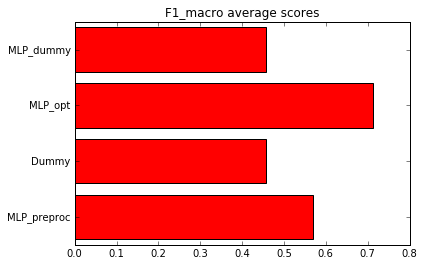

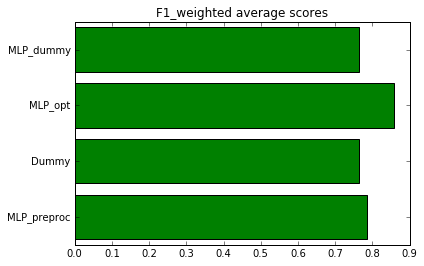

In [28]:
# Κάνουμε import την matplotplib
import matplotlib.pyplot as plt

f1_scores_macro = [item[2] for item in scores_macro.values()]
f1_scores_weighted = [item[2] for item in scores_weighted.values()]


y_pos = np.arange(len(f1_scores_macro))
plt.barh(y_pos, f1_scores_macro, align='center',color='red')
plt.yticks(y_pos, scores_macro.keys())
plt.title('F1_macro average scores')
plt.show()

y_pos = np.arange(len(f1_scores_weighted))
plt.barh(y_pos, f1_scores_weighted, align='center',color='green')
plt.yticks(y_pos, scores_weighted.keys())
plt.title('F1_weighted average scores')
plt.show()

_Μορφοποίηση εγγράφου by_

In [29]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
    margin-top:2em;
    margin-bottom:2em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
    font-size: 2.2em;
    line-height:1.4em;
    text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
    margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
    font-family: 'Calibri'; //Times New Roman
    font-size:1.5em;
    line-height:1.4em;
    padding-left:3em;
    padding-right:3em;
}
</style>
""")

